<a href="https://colab.research.google.com/github/razvanpetru1/ML_COMP4139_Assignment2/blob/main/Classification_Assignment2_pCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import os
import shutil
from subprocess import call

# Define the folder and repository
repo_path = '/content/ML_COMP4139_Assignment2'
repo_url = 'https://github.com/razvanpetru1/ML_COMP4139_Assignment2.git'

# Remove the default sample_data folder if it exists
sample_data_path = '/content/sample_data'
if os.path.exists(sample_data_path):
    shutil.rmtree(sample_data_path)

# Check if the repo folder already exists
if os.path.exists(repo_path):
    print(f"The repository folder '{repo_path}' already exists. Pulling latest changes...")
    os.chdir(repo_path)  # Navigate into the repository folder
    call(['git', 'pull'])  # Pull the latest changes
else:
    print(f"The repository folder '{repo_path}' does not exist. Cloning the repository...")
    call(['git', 'clone', repo_url, repo_path])  # Clone the repository

print("Done!")


The repository folder '/content/ML_COMP4139_Assignment2' already exists. Pulling latest changes...
Done!


# Dataset entry

Input:
 - Original DataBase file \

Output:
 - X_raw - Raw features values,
 - Y_raw - Raw labes values,
 - classification_task_selected_data.csv ( file that contains relevant datapoints for solving classification task)


Description for this section:  We want to select the relevant datapoint from original provided file, we create our own DataBase and select the features and lables for solving the classification problem. Also, we check for null values and for '999' - missing values.


Load dataset

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [25]:
''' Load the data and display the data structure '''


file_path = '/content/ML_COMP4139_Assignment2/TrainDataset2024.xls'

try:
  all_df = pd.read_excel(file_path)
  # print(df.head())  # Print the first few rows to inspect the data
  print(f'File was found at {file_path}')
except FileNotFoundError:
  print(f"File not found at: {file_path}")


all_df.head() # displays first 5 rows of the dataframe

File was found at /content/ML_COMP4139_Assignment2/TrainDataset2024.xls


,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [26]:
'''Drop the ID column'''
all_df = all_df.drop('ID', axis = 1)
display(all_df.head())

''' Obtain a quick description of the data'''
all_df.info()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,144.0,41.0,0,0,0,1,3,3,1,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0,142.0,39.0,1,1,0,0,3,3,1,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,1,135.0,31.0,0,0,0,1,2,1,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0,12.0,35.0,0,0,0,1,3,3,1,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0,109.0,61.0,1,0,0,0,2,1,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 120 entries, pCR (outcome) to original_ngtdm_Strength
dtypes: float64(108), int64(12)
memory usage: 375.1 KB


Select features and labels from the dataset for the classification task:

In [27]:
df_selected = all_df.iloc[:, 2:] # We extract all columns starting with column 3 - column O until the last column
df_selected.head()

# Add the pCR column to df_selected
df_selected.insert(0,                       # insert new column at index 0
                   'pCR (outcome)',         # name of this new column
                   all_df['pCR (outcome)']) # the data of this new column
display(df_selected.head())

,pCR (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,41.0,0,0,0,1,3,3,1,1,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0,39.0,1,1,0,0,3,3,1,1,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,1,31.0,0,0,0,1,2,1,1,0,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0,35.0,0,0,0,1,3,3,1,1,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0,61.0,1,0,0,0,2,1,1,0,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [28]:
'''Calculate some basic statistics of each column'''
df_selected.describe()

,pCR (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,...,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,12.697500,51.804674,0.547500,2.902500,2.797500,2.830000,9.875000,6.562500,8.63250,3.030000,...,3.957637e-01,3.911005e-01,2.722189e+00,0.003347,5.679717e+07,178.311246,32500.032620,0.056935,0.005965,0.029322
std,111.107417,10.948522,0.498362,49.932114,49.937068,49.935558,86.092911,70.444284,86.20034,49.925801,...,1.666319e-01,1.615922e-01,7.648849e-01,0.002419,7.063846e+08,1045.453432,177545.921568,0.047179,0.008379,0.115915
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.000000,44.516769,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,...,3.199017e-01,3.184398e-01,2.340783e+00,0.001389,1.030473e+06,18.760570,0.001826,0.018628,0.000310,0.001464
50%,0.000000,51.019507,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,1.000000,...,4.095627e-01,4.054695e-01,2.814884e+00,0.002944,3.277334e+06,67.929659,0.004383,0.047740,0.002330,0.003276
75%,0.000000,60.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.00000,1.000000,...,5.000049e-01,4.956920e-01,3.304411e+00,0.004798,9.079686e+06,157.370294,0.013769,0.085321,0.007962,0.009479
max,999.000000,79.603012,1.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


Save the relevant columns for the classification task in a separate csv file

In [29]:
# Save the selected columns to a new CSV file
output_file_path = '/content/ML_COMP4139_Assignment2/classification_task_selected_data.csv'
df_selected.to_csv(output_file_path, index=False)

print(f"CSV file created at: {output_file_path}")
print(f'DataFrame selected has the shape of {df_selected.shape} - rows, columns.')

CSV file created at: /content/ML_COMP4139_Assignment2/classification_task_selected_data.csv
DataFrame selected has the shape of (400, 119) - rows, columns.


Define input variable and labels

In [30]:
# Inputs variable (features)
X_raw = df_selected.iloc[:,1:]
print("Features database:")
display(X_raw.head())
print(f'Shape of feature dataset is {X_raw.shape} - rows, columns.')

Features database:


,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0,0,0,1,3,3,1,1,2,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,39.0,1,1,0,0,3,3,1,1,2,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,31.0,0,0,0,1,2,1,1,0,2,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,35.0,0,0,0,1,3,3,1,1,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,61.0,1,0,0,0,2,1,1,0,2,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


Shape of feature dataset is (400, 118) - rows, columns.


In [31]:
# Output variable (labelss)
Y_raw = df_selected.iloc[:,0]
print("Features database:")
display(Y_raw.head())
print(f'Shape of labels dataset is {Y_raw.shape} - rows, columns.')


Features database:


,pCR (outcome)
0,1
1,0
2,1
3,0
4,0


Shape of labels dataset is (400,) - rows, columns.


In [32]:
''' Check distribution of pCR column '''
Y_raw.value_counts()

,count
pCR (outcome),
0,311
1,84
999,5


# Data Pre-processing

Input:
 - X_raw - Raw features values,
 - Y_raw - Raw labels values,
 - classification_task_selected_data.csv ( file that contains relevant datapoints for solving classification task)

Output:
- EDA plots
- clean datapoints: Xs, Ys

Description for this section:
In this section we handle missing values, EDA analysis, statistic analyses, remove outliers, encoding, scale continuous Featyres etc.

A. Handling Missing Values

In [33]:
# Step 1: Check for null values in the entire DataFrame. Null values not '999'
missing_values = X_raw.isnull().sum()

# Display columns with missing values only
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Columns with null values:")
    print(missing_values)
else:
    print("No null values found in the dataset.")

No null values found in the dataset.


In [34]:
# Test for 999 values:
# we override a value in feature database and check if will be detected.
# Code:

#X_raw = X_raw.replace(999, pd.NA)

# IF WE DO this we need to load the original data again, to make sure we don't have 'hardcoded' values.

In [35]:
# Check for placeholder values (999) in X_raw
placeholder_counts_X = pd.Series((X_raw == 999).sum(), name='X_raw')

# Check for placeholder values (999) in Y_raw
placeholder_counts_Y = pd.Series((Y_raw == 999).sum(), name='Y_raw')

# Combine the results into a single DataFrame for easier visualization
placeholder_counts = pd.concat([placeholder_counts_X, placeholder_counts_Y], axis=1)

# Filter columns with placeholder values only
placeholder_counts = placeholder_counts[(placeholder_counts > 0).any(axis=1)]

# Display results
if not placeholder_counts.empty:
    print("Columns with placeholder values (999):")
    print(placeholder_counts)
else:
    print("No placeholder values (999) found in the dataset.")


Columns with placeholder values (999):
                 X_raw  Y_raw
PgR                1.0    NaN
HER2               1.0    NaN
TrippleNegative    1.0    NaN
ChemoGrade         3.0    NaN
Proliferation      2.0    NaN
HistologyType      3.0    NaN
LNStatus           1.0    NaN
Gene              88.0    NaN
0                  NaN    5.0


Remove row when target is missing - '999' placeholder

In [36]:
print(f"Old shapes - X_raw: {X_raw.shape}, Y_raw: {Y_raw.shape}")

# Find indices where Y_raw has the value 999
indices_to_remove = Y_raw[Y_raw == 999].index

# Remove these rows from X_raw and Y_raw
X_raw_cleaned = X_raw.drop(index=indices_to_remove, errors='ignore')
Y_raw_cleaned = Y_raw.drop(index=indices_to_remove, errors='ignore')

print(f"Removed {len(indices_to_remove)} rows where Y_raw had the value 999.")
print(f"Indices where Y_raw has the value 999: {indices_to_remove}, size: {indices_to_remove.size} datapoints.")

print(f"New shapes - X_raw: {X_raw_cleaned.shape}, Y_raw: {Y_raw_cleaned.shape}")


Old shapes - X_raw: (400, 118), Y_raw: (400,)
Removed 5 rows where Y_raw had the value 999.
Indices where Y_raw has the value 999: Index([10, 342, 366, 372, 373], dtype='int64'), size: 5 datapoints.
New shapes - X_raw: (395, 118), Y_raw: (395,)


**Replace '999' in features variable**




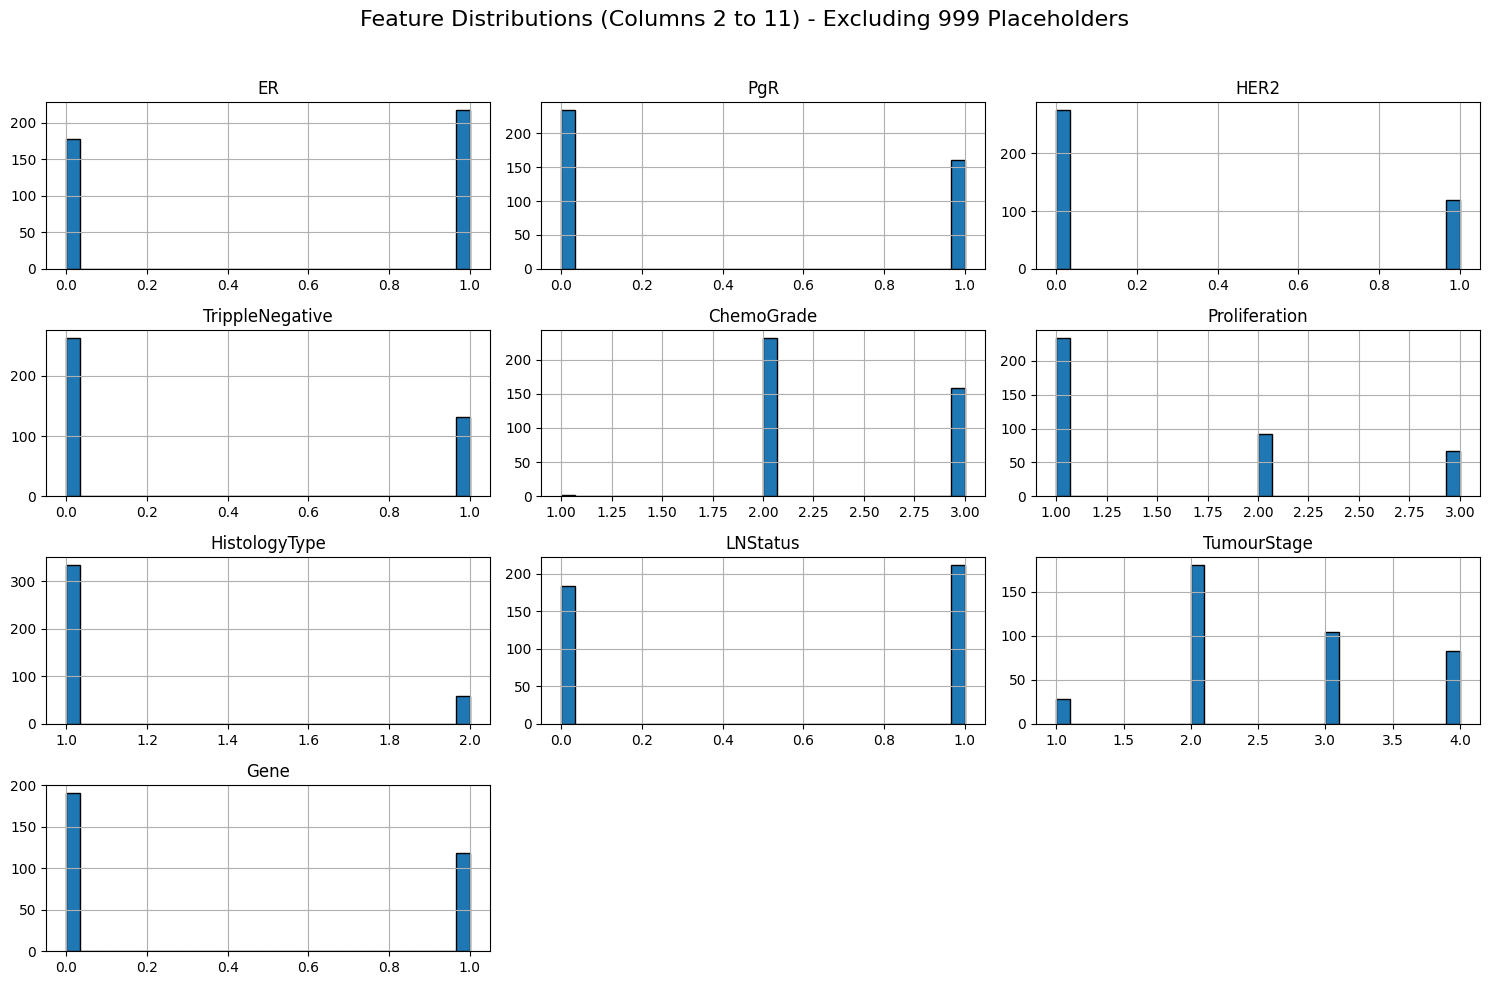

In [37]:
# Histogram for categorical data
# Replace placeholder values (999) with NaN to exclude them from the histogram
X_filtered_display = X_raw_cleaned.replace(999, np.nan)

# Specify the columns to plot
start_col = 1
end_col = 11

# Plot histograms, skipping the 999 placeholders
X_filtered_display.iloc[:, start_col:end_col].hist(bins=30, figsize=(15, 10), edgecolor='black')

# Add title
plt.suptitle(f"Feature Distributions (Columns {start_col + 1} to {end_col}) - Excluding 999 Placeholders", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Replace missing features "999" from:

[image.png] with mode (most frequent value).

In [38]:
X_filtered1 = X_raw_cleaned
for col in ['ER','PgR', 'HER2', 'TrippleNegative', 'ChemoGrade', 'Proliferation', 'HistologyType', 'LNStatus','TumourStage']:
    mode_value = X_raw_cleaned[col].mode()[0]
    X_filtered1[col] = X_raw_cleaned[col].replace(999, mode_value)


Replace missing features "999" from 'Gene' usin Random Forest Classifier to predict and input the missing values

In [39]:
# This is to save the genes classes in separate variable
known_genes = X_filtered1[X_filtered1['Gene'] != 999]
display(known_genes['Gene'].value_counts())

unknown_genes = X_filtered1[X_filtered1['Gene'] == 999]
display(unknown_genes['Gene'].value_counts())


,count
Gene,
0,191
1,119


,count
Gene,
999,85


In [40]:
X_filtered2 = X_filtered1

# Train a model to predict 'Gene' based on the other features

from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
model.fit(known_genes.drop('Gene', axis=1), known_genes['Gene'])

# Predict 'Gene' for the unknown genes
predicted_genes = model.predict(unknown_genes.drop('Gene', axis=1))
print(f'Prediction genes: {predicted_genes}')

Prediction genes: [1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0]


In [41]:
X_filtered = X_filtered1
# Replace with predicted gene
X_filtered.loc[unknown_genes.index, ['Gene']] = predicted_genes

zeros = X_filtered2[X_filtered2['Gene'] == 0]
ones = X_filtered2[X_filtered2['Gene'] == 1]

total_RFC_df = pd.concat([zeros, ones])
print(total_RFC_df['Gene'].value_counts())

Gene
0    256
1    139
Name: count, dtype: int64


In [42]:

# This is to save the genes classes in separate variable
known_genesAfter = X_filtered[X_filtered['Gene'] != 999]
display(known_genesAfter['Gene'].value_counts())

unknown_genesAfter = X_filtered[X_filtered['Gene'] == 999]
display(unknown_genesAfter['Gene'].value_counts())



,count
Gene,
0,256
1,139


,count
Gene,


TEST placeholders '999'

In [43]:

Y_filtered = Y_raw_cleaned

# Check for placeholder values (999) in X_raw
placeholder_counts_X = pd.Series((X_filtered == 999).sum(), name='X_raw')

# Check for placeholder values (999) in Y_raw
placeholder_counts_Y = pd.Series((Y_filtered == 999).sum(), name='Y_raw')

# Combine the results into a single DataFrame for easier visualization
placeholder_counts = pd.concat([placeholder_counts_X, placeholder_counts_Y], axis=1)

# Filter columns with placeholder values only
placeholder_counts = placeholder_counts[(placeholder_counts > 0).any(axis=1)]

# Display results
if not placeholder_counts.empty:
    print("Columns with placeholder values (999):")
    print(placeholder_counts)
else:
    print("No placeholder values (999) found in the dataset.")


Y_filtered
X_filtered

No placeholder values (999) found in the dataset.


,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0,0,0,1,3,3,1,1,2,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,39.0,1,1,0,0,3,3,1,1,2,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,31.0,0,0,0,1,2,1,1,0,2,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,35.0,0,0,0,1,3,3,1,1,3,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,61.0,1,0,0,0,2,1,1,0,2,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,58.5,1,0,1,0,3,2,1,1,4,...,0.476493,0.476493,2.453583,0.003229,2.327038e+06,18.562377,0.013766,0.018042,0.000288,0.012257
396,34.3,0,0,0,1,3,3,1,0,2,...,0.418382,0.418382,2.995603,0.004243,1.005061e+06,156.627179,0.002228,0.136015,0.022148,0.002098
397,53.3,0,0,0,1,2,1,1,0,2,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
398,68.8,1,0,0,0,3,3,1,1,3,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368


**B. Addresing outliers**

Identifying outliers can be done using statistical and algorithmic approaches.

 Identify outliers using the Modified Z-Score

In [44]:
def detect_outliers_in_columns_range(dataframe, start_index, end_index, threshold=10):
    """
    Detects outliers in a range of columns in a dataframe using the Modified Z-Score method.
    Plots histograms and boxplots only for columns where outliers exceed the threshold.

    Args:
        dataframe (pd.DataFrame): The input dataset.
        start_index (int): The starting index of the column range (inclusive).
        end_index (int): The ending index of the column range (inclusive).
        threshold (float): The threshold for identifying outliers. Default is 5.

    Returns:
        results (dict): A dictionary with column names as keys and outlier values as values.
    """
    results = {}

    # Loop through the specified range of columns
    for column_index in range(start_index, end_index + 1):
        if column_index < 0 or column_index >= dataframe.shape[1]:
            print(f"Skipping invalid column index: {column_index}")
            continue

        column_name = dataframe.columns[column_index]
        data = dataframe.iloc[:, column_index].dropna()  # Remove NaN values

        # Calculate the median and MAD
        median = np.median(data)
        mad = np.median(np.abs(data - median))

        # Compute Modified Z-Score
        modified_z_scores = 0.6745 * (data - median) / mad

        # Identify outliers
        outliers = np.abs(modified_z_scores) > threshold
        outlier_values = data[outliers]

        # Save the results
        results[column_name] = outlier_values

        # Plot only if there are outliers above the threshold
        if len(outlier_values) > 0:
            # Create a figure with two subplots: one for the histogram and one for the boxplot
            plt.figure(figsize=(14, 6))

            # Subplot 1: Histogram
            plt.subplot(1, 2, 1)
            sns.histplot(data, kde=True, bins=30, color="blue")
            plt.title(f"Histogram for {column_name}")
            plt.xlabel(column_name)
            plt.ylabel("Frequency")

            # Subplot 2: Boxplot
            plt.subplot(1, 2, 2)
            sns.boxplot(x=data, color="orange")
            plt.title(f"Boxplot for {column_name}")
            plt.xlabel(column_name)

            # Show the combined plots
            plt.tight_layout()
            plt.show()

    return results



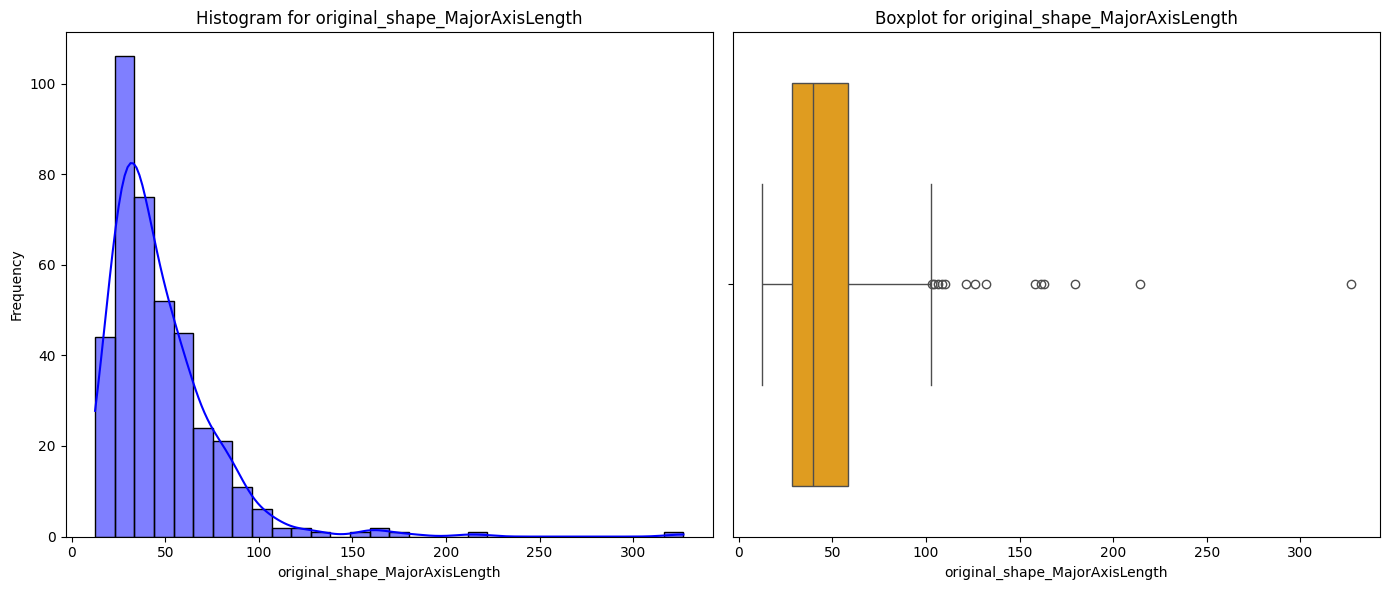

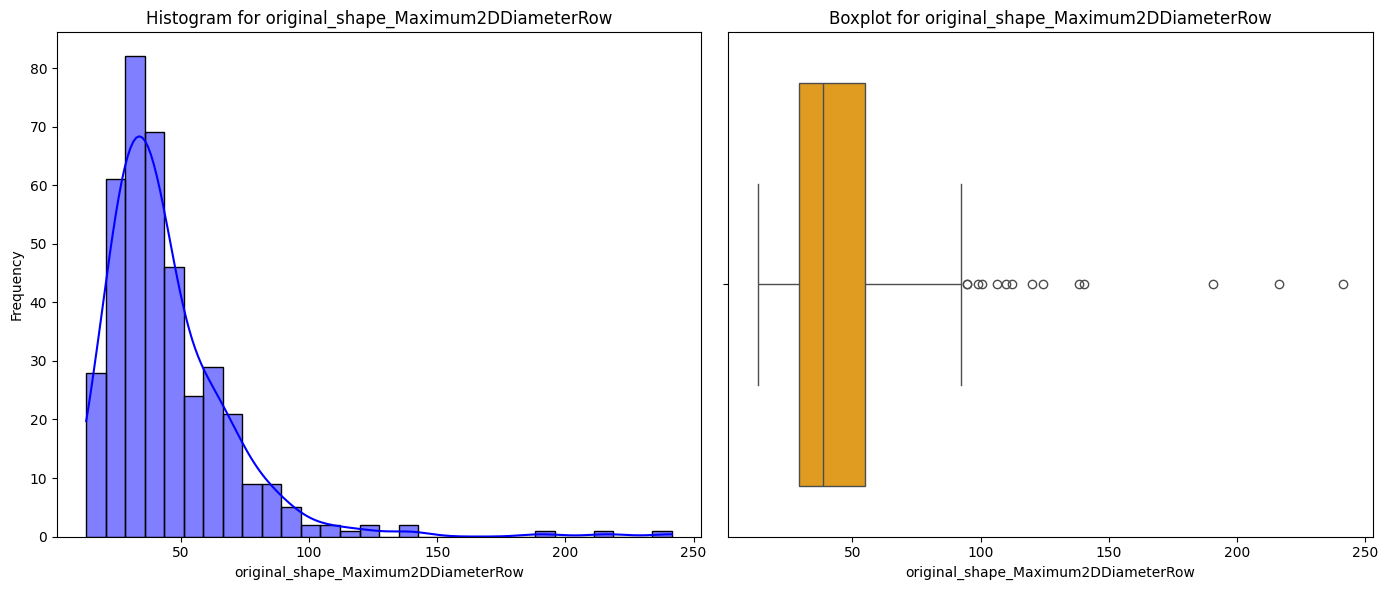

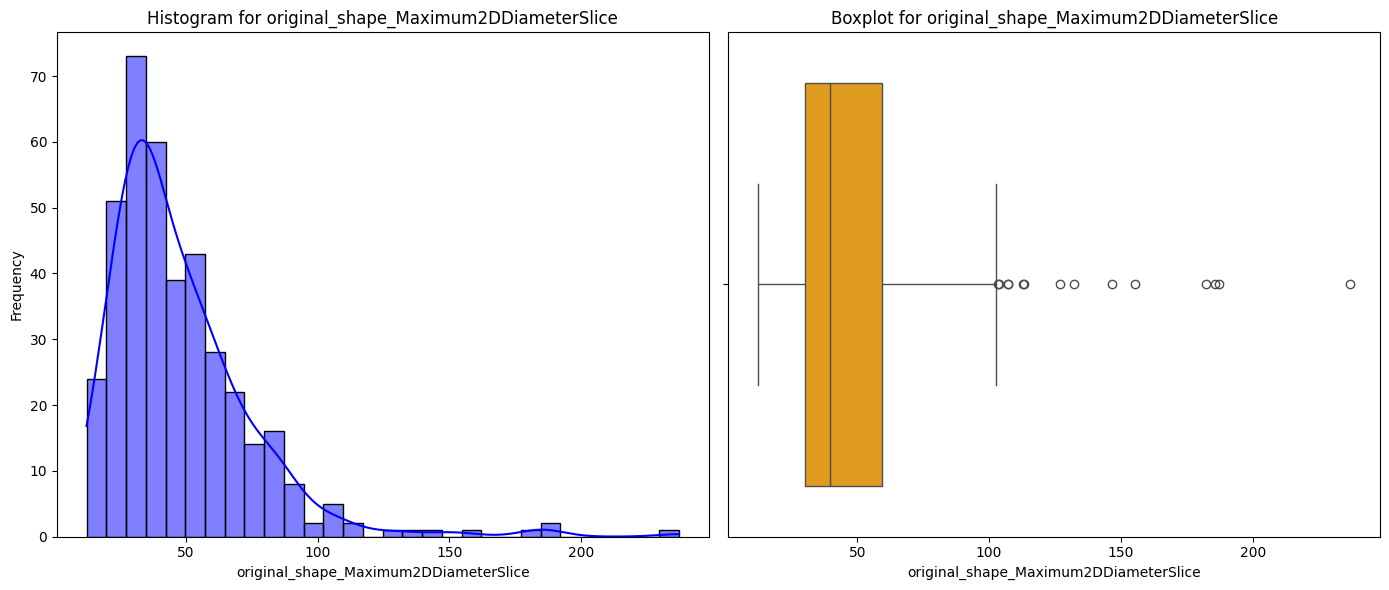

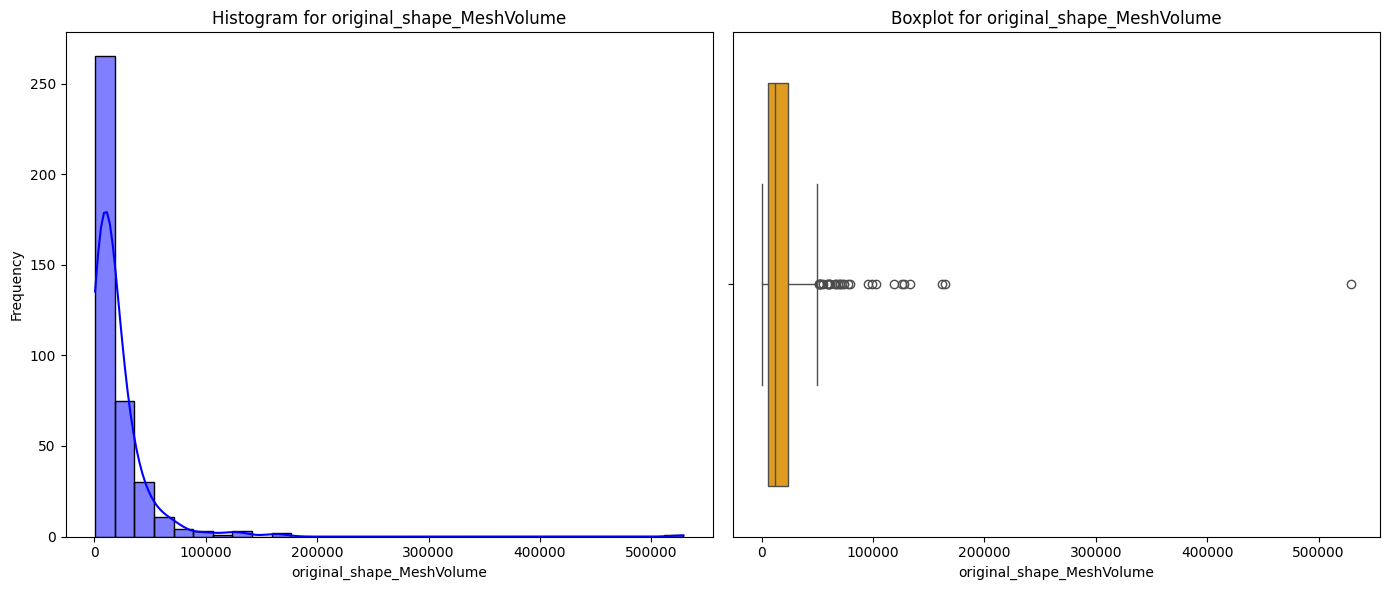

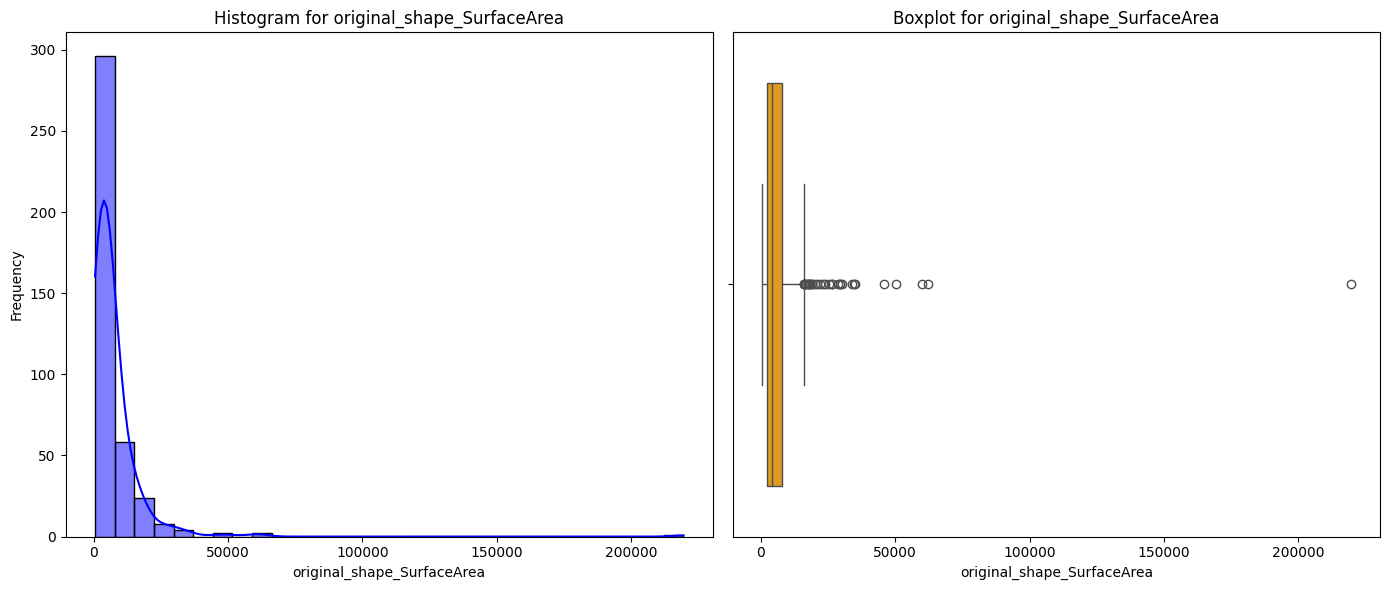

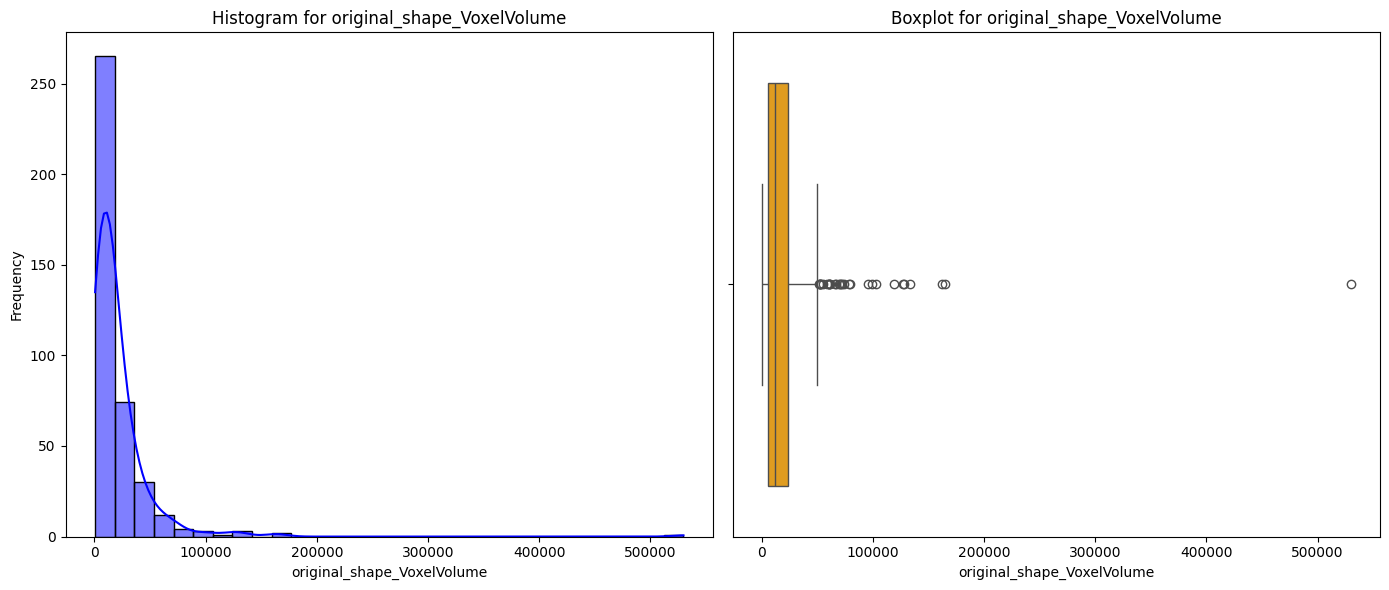

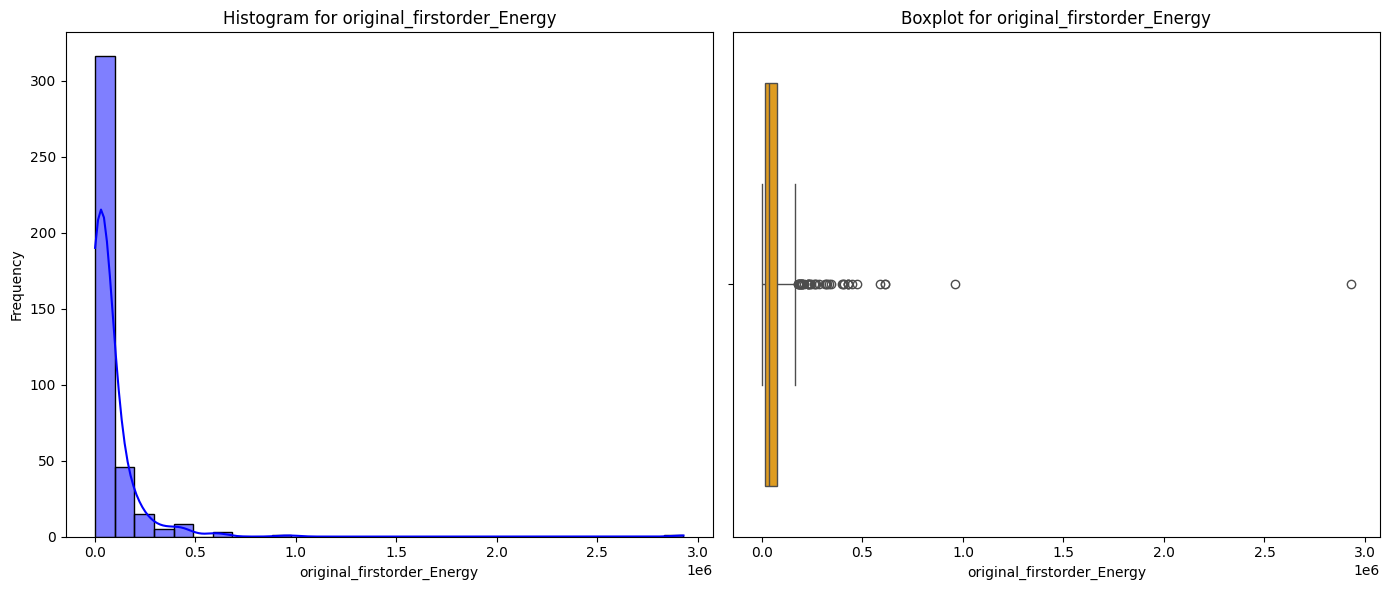

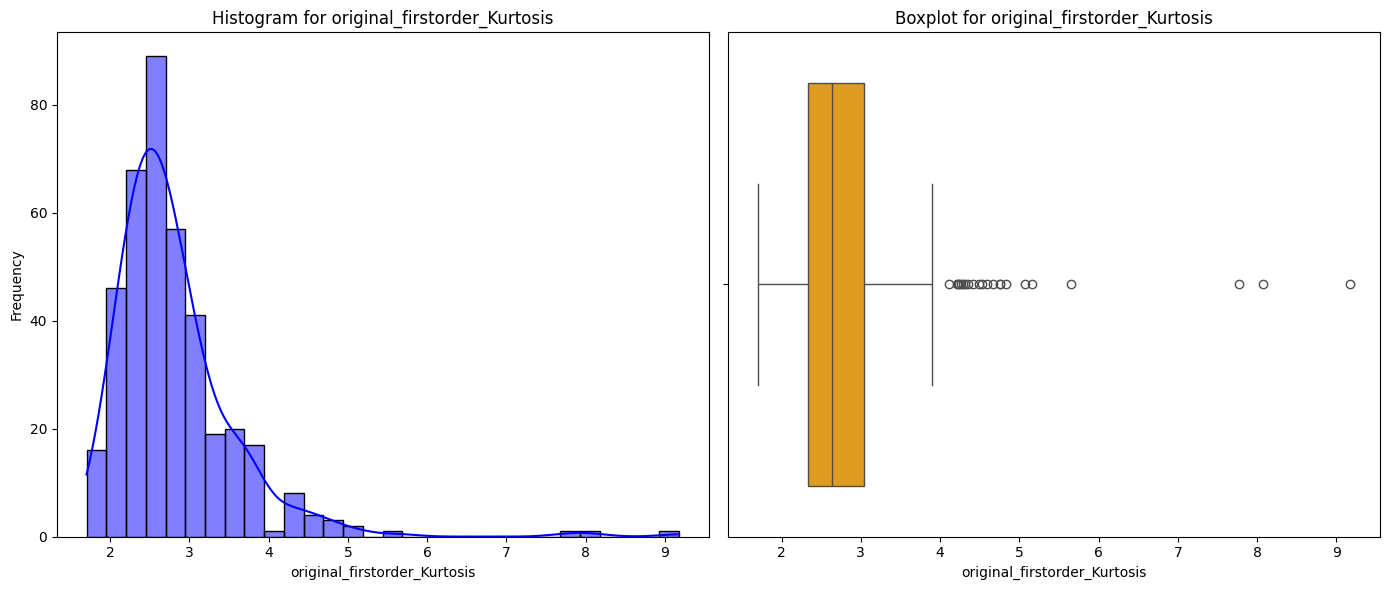

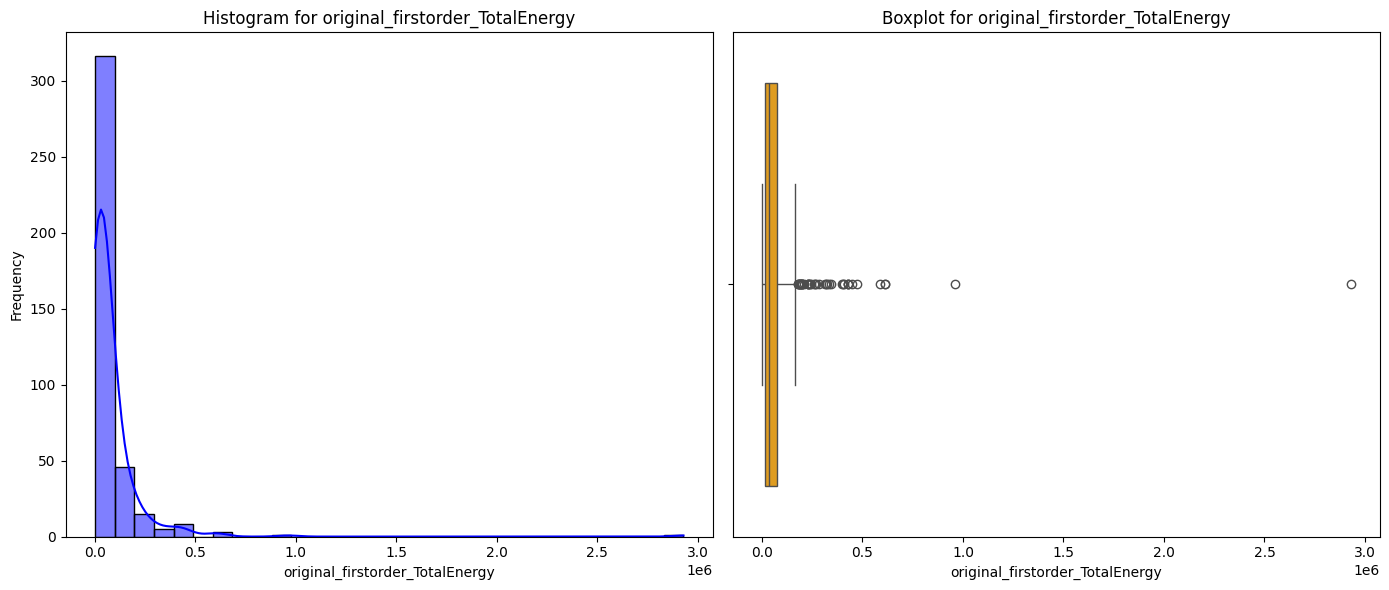

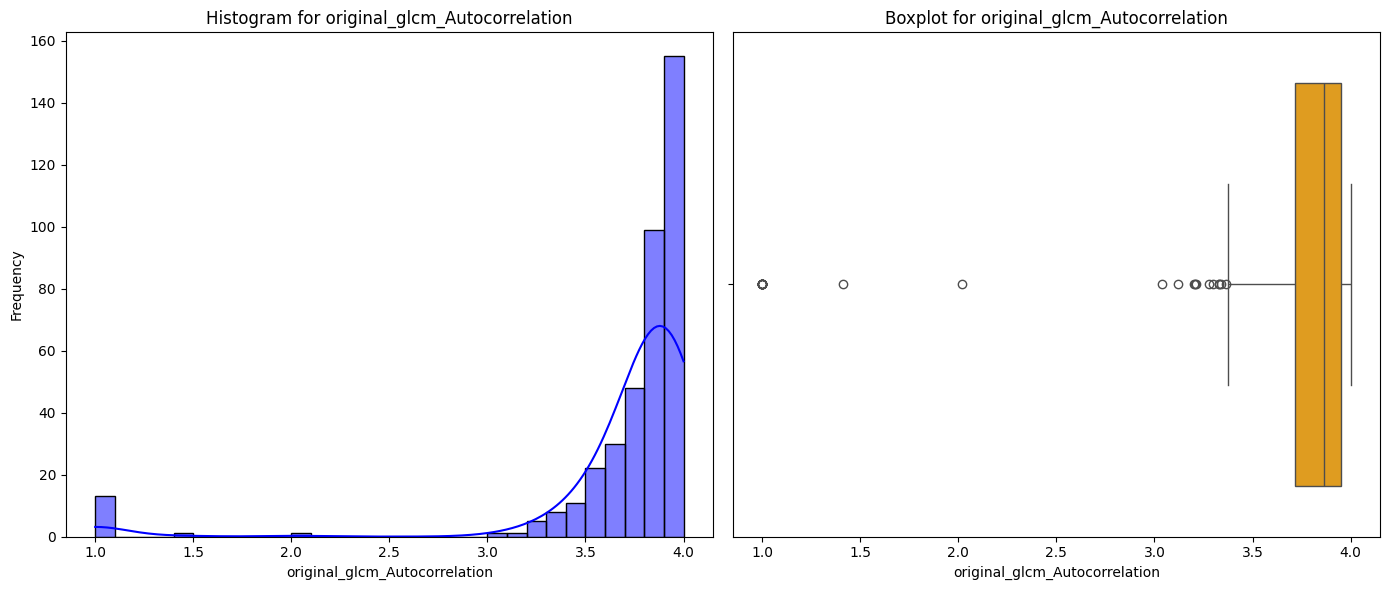

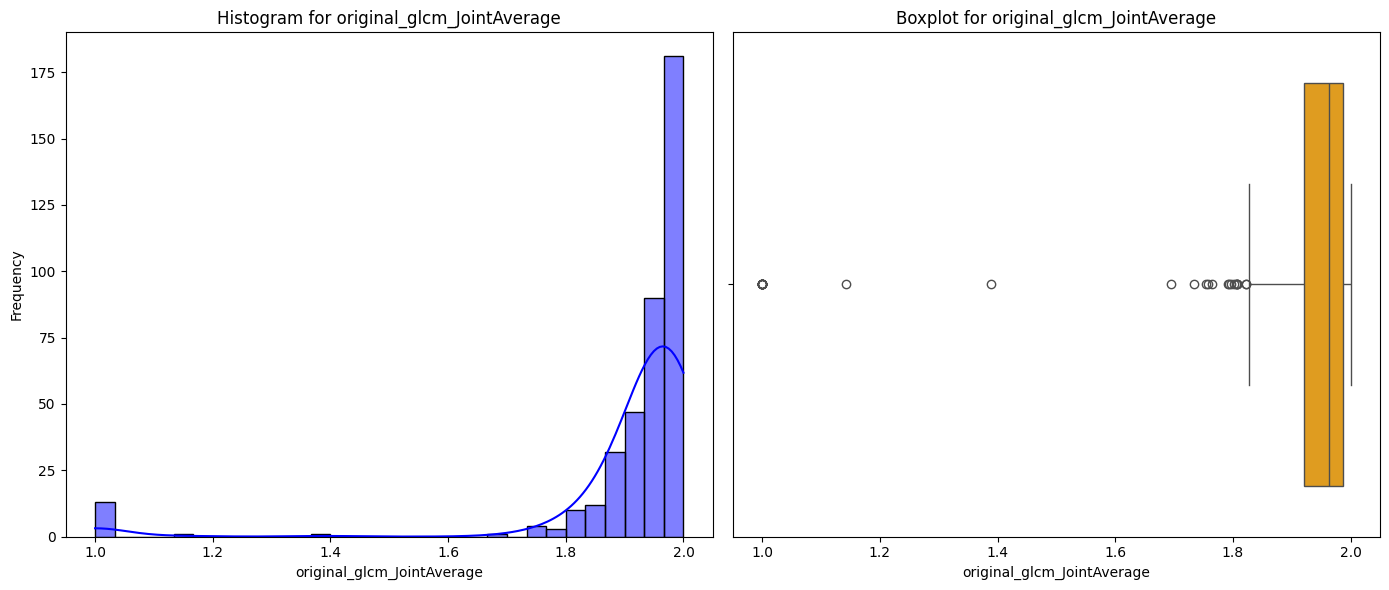

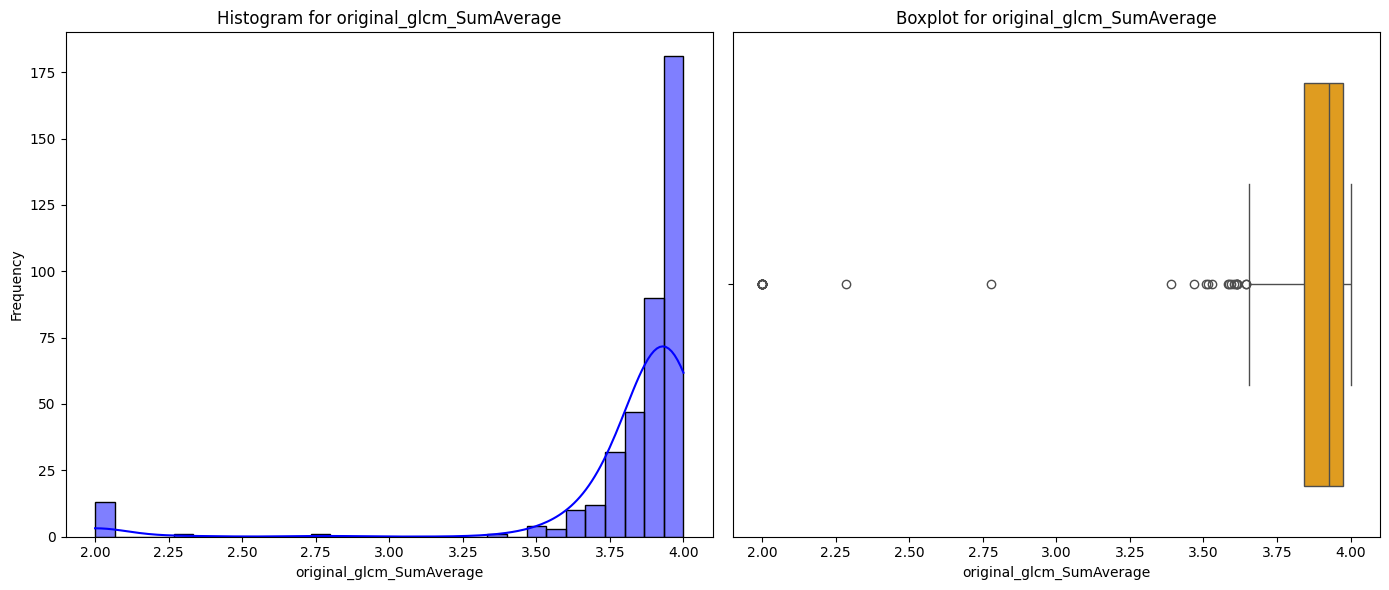

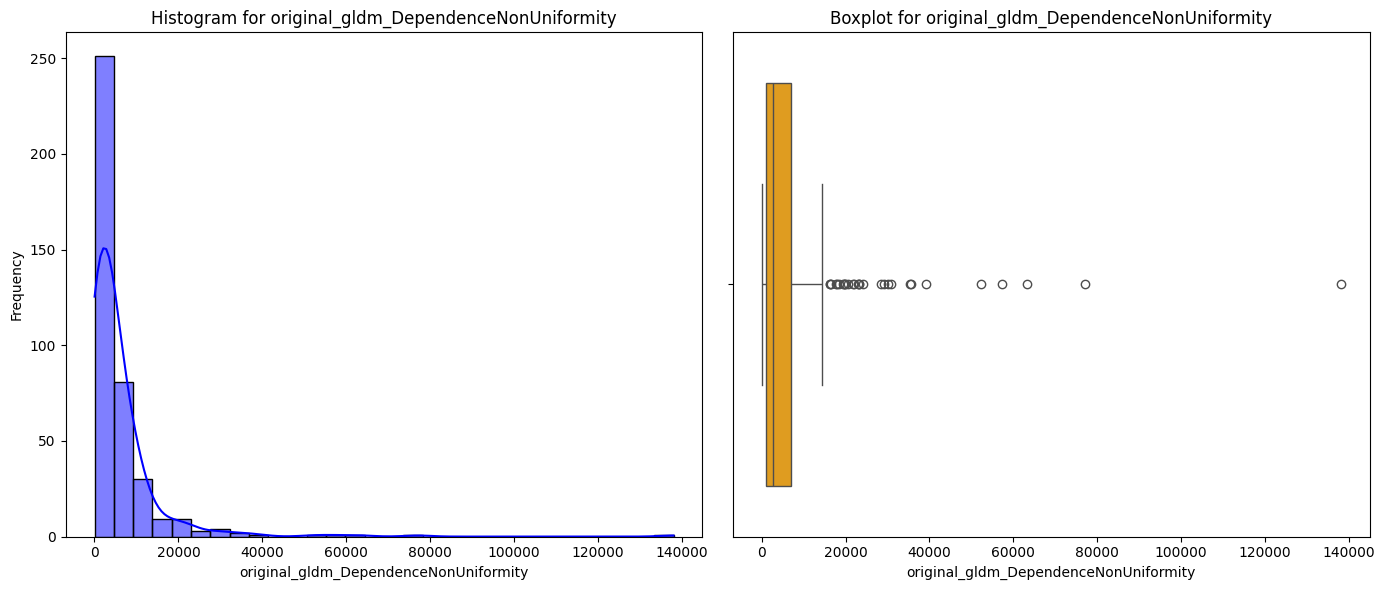

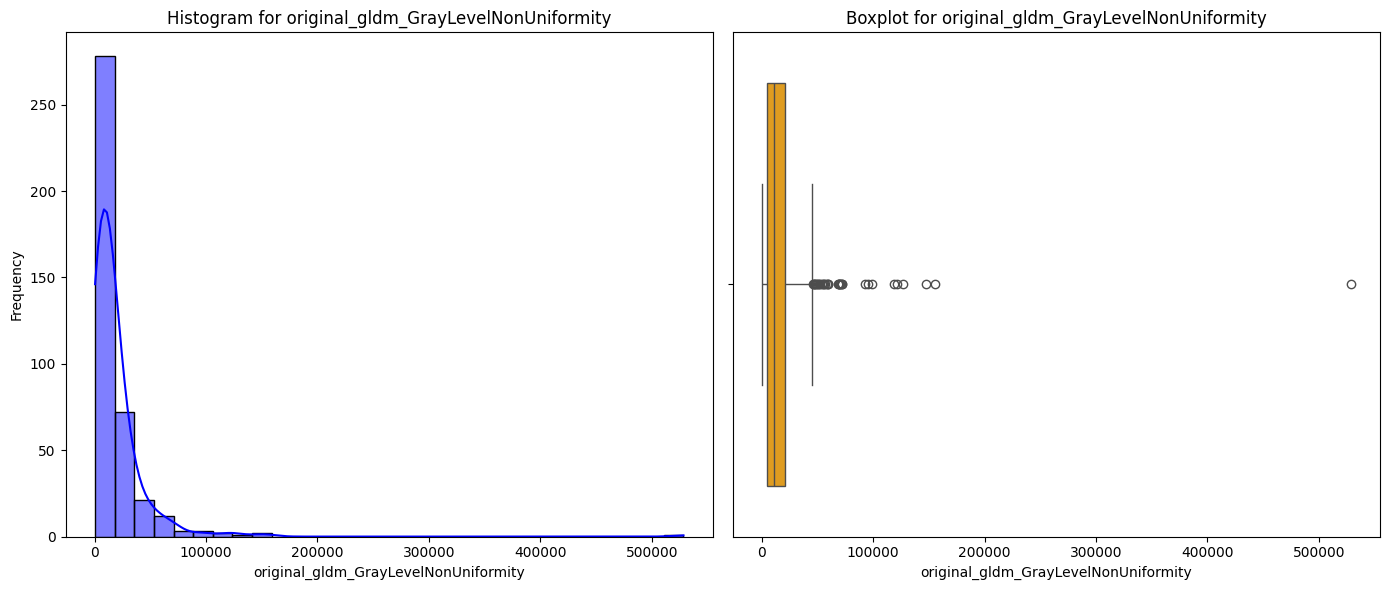

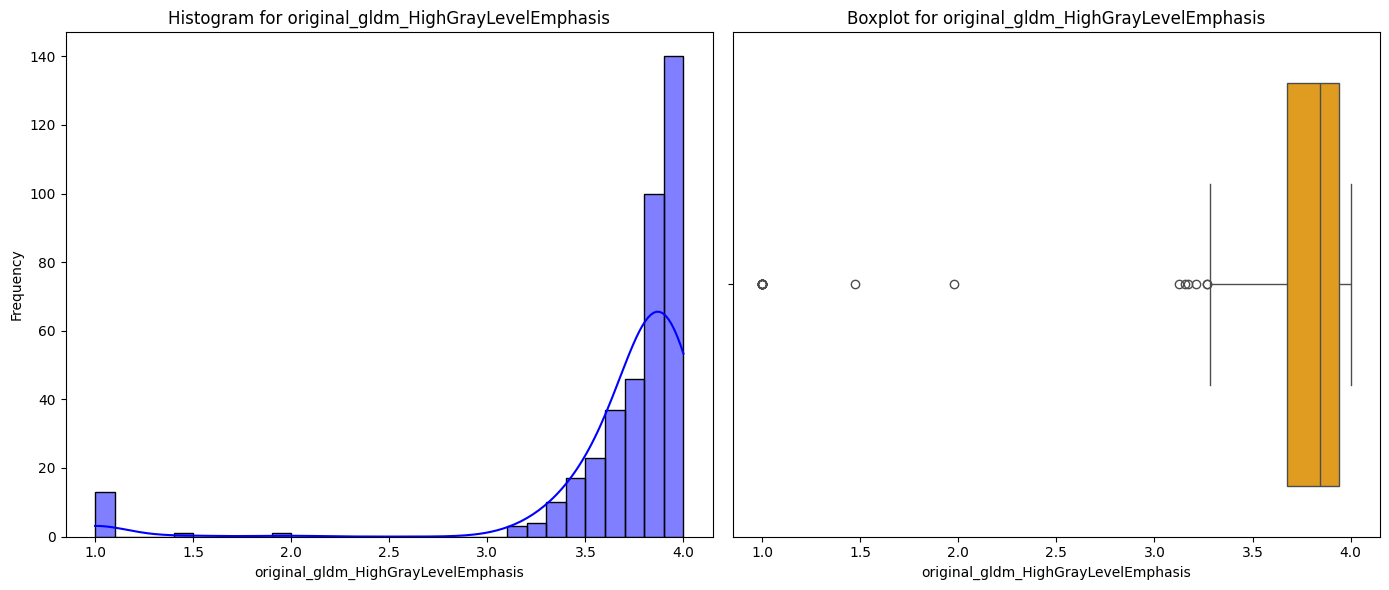

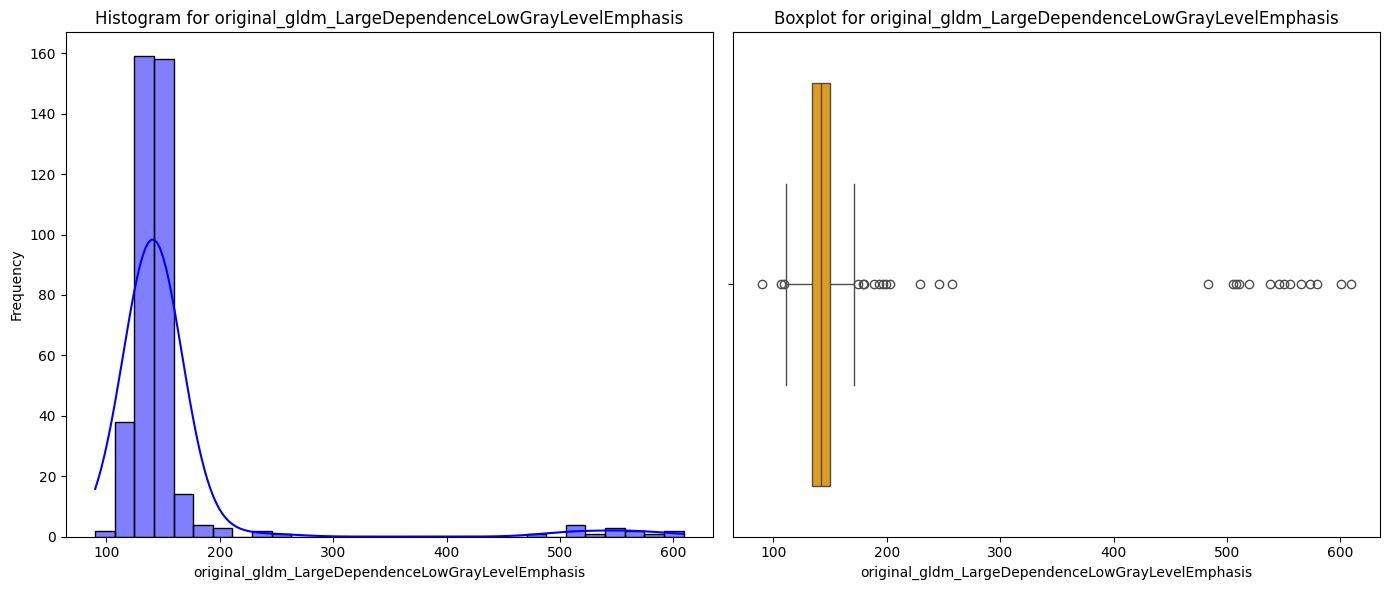

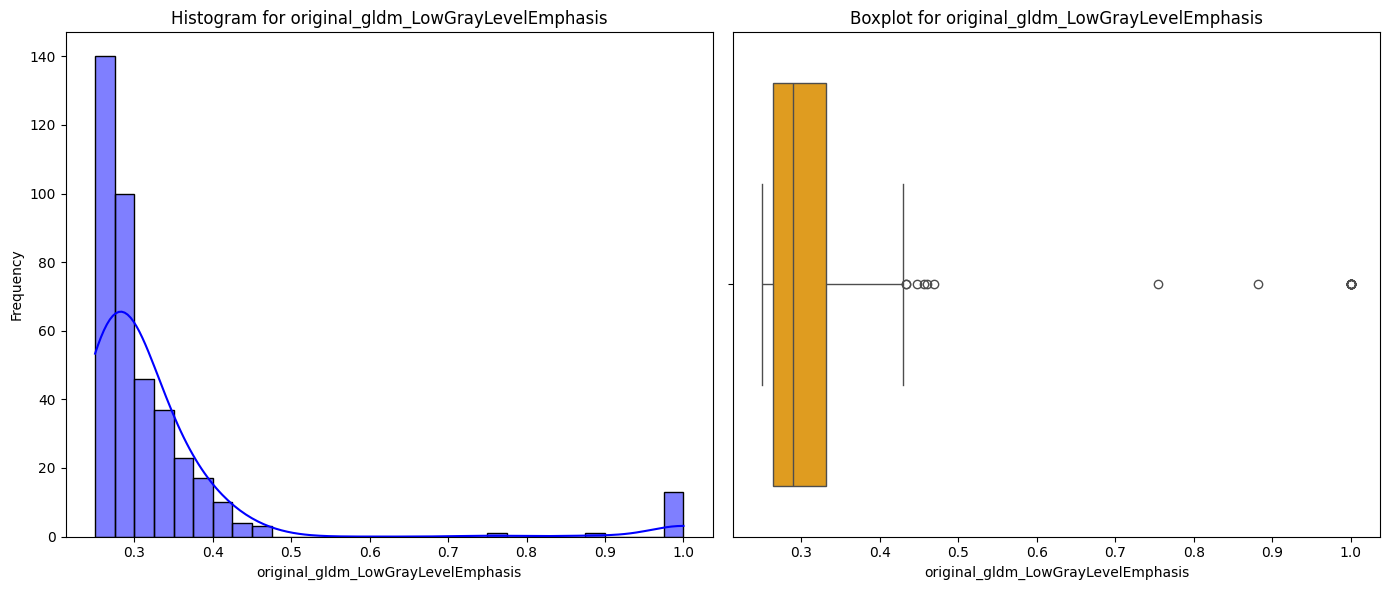

Outliers in original_shape_Elongation:
Series([], Name: original_shape_Elongation, dtype: float64)
Outliers in original_shape_Flatness:
Series([], Name: original_shape_Flatness, dtype: float64)
Outliers in original_shape_LeastAxisLength:
Series([], Name: original_shape_LeastAxisLength, dtype: float64)
Outliers in original_shape_MajorAxisLength:
340    326.866827
Name: original_shape_MajorAxisLength, dtype: float64
Outliers in original_shape_Maximum2DDiameterColumn:
Series([], Name: original_shape_Maximum2DDiameterColumn, dtype: float64)
Outliers in original_shape_Maximum2DDiameterRow:
216    216.453228
340    241.530536
Name: original_shape_Maximum2DDiameterRow, dtype: float64
Outliers in original_shape_Maximum2DDiameterSlice:
340    237.033753
Name: original_shape_Maximum2DDiameterSlice, dtype: float64
Outliers in original_shape_Maximum3DDiameter:
Series([], Name: original_shape_Maximum3DDiameter, dtype: float64)
Outliers in original_shape_MeshVolume:
70     133161.5417
213    162275.

In [45]:

outlier_results = detect_outliers_in_columns_range(X_filtered, 11, 80)

# Print the results
for feature, outliers in outlier_results.items():
    print(f"Outliers in {feature}:")
    print(outliers)


**C. One-Hot Encoding**

Convertes categories into binary columns.